Capstone Two Data Wrangling 

Imports

In [97]:
#Import pandas, matplotlib.pyplot, seaborn, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# This is giving me a problem. I will use pandas save function for now.
#from library.sb_utils import save_file

First load data

In [35]:
# Load the Area Health Resources data and NCHS mortality data 
ahrf_data = pd.read_csv('../data/raw/AHRF_Demographics_Dashboard_Download_2015-2019.csv')
mortality_data = pd.read_parquet('../data/raw/compiled_data.parquet')


In [36]:
#View the summary of the AHRF data
ahrf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924 entries, 0 to 1923
Data columns (total 40 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Area Health Resource Files Release Year            1924 non-null   object 
 1   Occupation Code                                    1924 non-null   object 
 2   Occupation Name                                    1924 non-null   object 
 3   Geography Code                                     1924 non-null   int64  
 4   Geography Abbreviation                             1924 non-null   object 
 5   Geography Name                                     1924 non-null   object 
 6   Total Count                                        1871 non-null   float64
 7   Hispanic or Latino (N)                             967 non-null    float64
 8   White* (N)                                         1851 non-null   float64
 9   Black or

In [37]:
#View the summary of the NCHS data
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26779062 entries, 0 to 26779061
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               float64
 1   month              object 
 2   age_detail_number  float64
 3   sex                object 
 4   place_of_death     float64
 5   education1989      object 
 6   education2003      object 
 7   education_flag     object 
 8   all_icd            object 
 9   hisp_recode        float64
 10  race_recode        float64
 11  race_recode_alt    float64
 12  race_recode_new    float64
 13  agey               float64
dtypes: float64(8), object(6)
memory usage: 2.8+ GB


In [38]:
#print the first several row of each data
ahrf_data.head()

,Area Health Resource Files Release Year,Occupation Code,Occupation Name,Geography Code,Geography Abbreviation,Geography Name,Total Count,Hispanic or Latino (N),White* (N),Black or African American* (N),...,40 to 49 Years Old (%),50 to 59 Years Old (%),60 or Older (%),Male (%),Female (%),Missing or Suppressed Race/Ethnicity Data Comment,Missing or Suppressed Age Data Comment,Missing or Suppressed Gender Data Comment,HRSA Data Warehouse Processing Date,Unnamed: 39
0,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,1,AL,Alabama,4546.0,NaN,3989.0,418.0,...,24.747,21.755,7.567,18.918,81.082,Hispanic: Supressed; Native Hawaiian/ Pacific ...,NaN,NaN,2022/03/21,NaN
1,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,2,AK,Alaska,765.0,NaN,643.0,NaN,...,30.065,NaN,17.124,NaN,98.954,Hispanic: [No Data]; Black (Non-Hispanic): [No...,Less than 30 Years Old: Supressed; 50 to 59 Ye...,Male: Supressed,2022/03/21,NaN
2,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,4,AZ,Arizona,3952.0,478.0,2998.0,125.0,...,24.595,24.949,18.219,19.104,80.896,Native Hawaiian/ Pacific Islander: Supressed; ...,NaN,NaN,2022/03/21,NaN
3,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,5,AR,Arkansas,1849.0,NaN,1655.0,146.0,...,25.690,24.013,13.196,18.983,81.017,Hispanic: Supressed; Asian (Non-Hispanic): Sup...,NaN,NaN,2022/03/21,NaN
4,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,6,CA,California,13557.0,1364.0,7661.0,826.0,...,22.077,21.553,19.068,15.136,84.864,Native Hawaiian/ Pacific Islander: Supressed; ...,NaN,NaN,2022/03/21,NaN


In [44]:
mortality_data.tail()

,year,month,age_detail_number,sex,place_of_death,education1989,education2003,education_flag,all_icd,hisp_recode,race_recode,race_recode_alt,race_recode_new,agey
26779057,2022.0,09,74.0,M,1.0,None,4,1,C189_I490_A415_A499_C189_R628_I10_C80,0.0,NaN,1.0,1.0,74.0
26779058,2022.0,09,64.0,M,6.0,None,2,1,I461_I461,0.0,NaN,2.0,2.0,64.0
26779059,2022.0,09,32.0,M,2.0,None,3,1,V877_T149_V877,0.0,NaN,1.0,1.0,32.0
26779060,2022.0,09,70.0,M,4.0,None,4,1,I251_I509_I10_I251,0.0,NaN,2.0,2.0,70.0
26779061,2022.0,09,79.0,M,4.0,None,3,1,C901_C901_E149_D649_I64_F019_R53_L899_N19,0.0,NaN,1.0,1.0,79.0


In [40]:
ahrf_data.describe()

,Geography Code,Total Count,Hispanic or Latino (N),White* (N),Black or African American* (N),Asian* (N),Native Hawaiian or Other Pacific Islander* (N),American Indian or Alaska Native* (N),Other or Multiple Races* (N),Less than 30 Years Old (N),...,American Indian or Alaska Native* (%),Other or Multiple Races* (%),Less than 30 Years Old (%),30 to 39 Years Old (%),40 to 49 Years Old (%),50 to 59 Years Old (%),60 or Older (%),Male (%),Female (%),Unnamed: 39
count,1924.000000,1.871000e+03,967.000000,1.851000e+03,985.000000,875.000000,72.000000,261.000000,694.000000,1561.000000,...,260.000000,694.000000,1561.000000,1686.000000,1649.000000,1625.000000,1540.000000,1602.000000,1833.000000,0.0
mean,30.153846,1.632059e+04,3872.054809,1.003289e+04,4937.021320,2767.376000,552.236111,550.624521,906.829971,4288.074952,...,3.280585,3.099879,24.386322,26.623757,21.770582,18.902946,14.215232,28.969579,74.486318,NaN
std,17.714211,1.083616e+05,19843.548418,6.609566e+04,30536.575406,14772.725095,1081.364611,1617.391477,3800.160700,26012.360192,...,6.275035,3.363032,13.407798,8.213288,6.710659,7.064853,8.255183,21.307936,20.306304,NaN
min,1.000000,3.900000e+01,34.000000,3.400000e+01,36.000000,39.000000,26.000000,14.000000,26.000000,36.000000,...,0.059000,0.412000,2.404000,3.348000,2.199000,3.478000,1.429000,1.728000,6.327000,NaN
25%,16.750000,9.095000e+02,192.500000,7.250000e+02,242.000000,170.500000,133.750000,99.000000,120.000000,287.000000,...,0.356750,1.589250,15.404000,21.489500,17.571000,14.341000,8.185500,12.628250,65.844000,NaN
50%,29.500000,2.489000e+03,413.000000,1.955000e+03,585.000000,374.000000,214.000000,187.000000,224.500000,706.000000,...,0.856000,2.185500,21.808000,25.968500,21.539000,18.432000,12.766500,22.953500,80.426000,NaN
75%,42.500000,7.438500e+03,1429.000000,5.199000e+03,2089.000000,1090.500000,491.500000,378.000000,523.000000,2018.000000,...,4.060250,3.260250,32.274000,30.691500,25.000000,22.318000,18.224500,38.646000,89.832000,NaN
max,91.000000,3.276074e+06,346402.000000,2.296253e+06,730399.000000,296085.000000,6996.000000,16675.000000,63481.000000,632371.000000,...,74.603000,37.045000,100.000000,70.849000,78.049000,77.670000,66.399000,100.000000,100.000000,NaN


In [41]:
mortality_data.describe()

,year,age_detail_number,place_of_death,hisp_recode,race_recode,race_recode_alt,race_recode_new,agey
count,2.677906e+07,2.677906e+07,2.677906e+07,2.677906e+07,2.061426e+07,2.677906e+07,2.677906e+07,2.677906e+07
mean,2.018232e+03,7.316200e+01,3.596922e+00,3.211142e+00,1.441226e+00,5.885132e+00,4.225049e+00,7.306848e+01
std,2.587162e+00,2.110793e+01,2.045588e+00,5.586275e+01,8.908141e-01,6.671972e+01,5.296836e+01,2.048516e+01
min,2.014000e+03,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.902588e-06
25%,2.016000e+03,6.400000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.400000e+01
50%,2.018000e+03,7.600000e+01,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.600000e+01
75%,2.021000e+03,8.600000e+01,5.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,8.600000e+01
max,2.022000e+03,9.990000e+02,9.000000e+00,9.990000e+02,5.000000e+00,9.990000e+02,9.990000e+02,9.990000e+02


In [42]:
mortality_data.columns

Index(['year', 'month', 'age_detail_number', 'sex', 'place_of_death',
       'education1989', 'education2003', 'education_flag', 'all_icd',
       'hisp_recode', 'race_recode', 'race_recode_alt', 'race_recode_new',
       'agey'],
      dtype='object')

In [43]:
ahrf_data.columns

Index(['Area Health Resource Files Release Year', 'Occupation Code',
       'Occupation Name', 'Geography Code', 'Geography Abbreviation',
       'Geography Name', 'Total Count', 'Hispanic or Latino (N)', 'White* (N)',
       'Black or African American* (N)', 'Asian* (N)',
       'Native Hawaiian or Other Pacific Islander* (N)',
       'American Indian or Alaska Native* (N)', 'Other or Multiple Races* (N)',
       'Less than 30 Years Old (N)', '30 to 39 Years Old (N)',
       '40 to 49 Years Old (N)', '50 to 59 Years Old (N)', '60 or Older (N)',
       'Male (N)', 'Female (N)', 'Hispanic or Latino (%)', 'White* (%)',
       'Black or African American* (%)', 'Asian* (%)',
       'Native Hawaiian or Other Pacific Islander* (%)',
       'American Indian or Alaska Native* (%)', 'Other or Multiple Races* (%)',
       'Less than 30 Years Old (%)', '30 to 39 Years Old (%)',
       '40 to 49 Years Old (%)', '50 to 59 Years Old (%)', '60 or Older (%)',
       'Male (%)', 'Female (%)',
       'M

In [31]:
len(ahrf_data)

1924

In [32]:
len(mortality_data)

26779062

Explore The Data

Number of missing values by column

Filter out column African Amarican / Balck race as the race of interest. 

In [133]:
# Filter on Column Black or African American* (N) and transpose for easy viewing. 
#This is to isolate any person who identifies as fully or partially a member of the race
ahrfB_data = ahrf_data[ahrf_data['Black or African American* (N)'].isna()].T
ahrfB_data

,1,5,11,12,14,15,16,17,19,23,...,1911,1912,1913,1914,1916,1917,1919,1920,1921,1922
Area Health Resource Files Release Year,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,...,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019,ACS 5-Year 2015-2019
Occupation Code,D3256,D3256,D3256,D3256,D3256,D3256,D3256,D3256,D3256,D3256,...,D3648,D3648,D3648,D3648,D3648,D3648,D3648,D3648,D3648,D3648
Occupation Name,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,Advanced Practice Registered Nurses (excl. Cli...,...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...,Veterinary Assistants & Laboratory Animal Care...
Geography Code,2,8,15,16,18,19,20,21,23,27,...,44,45,46,47,49,50,53,54,55,56
Geography Abbreviation,AK,CO,HI,ID,IN,IA,KS,KY,ME,MN,...,RI,SC,SD,TN,UT,VT,WA,WV,WI,WY
Geography Name,Alaska,Colorado,Hawaii,Idaho,Indiana,Iowa,Kansas,Kentucky,Maine,Minnesota,...,Rhode Island,South Carolina,South Dakota,Tennessee,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Total Count,765.0,3118.0,449.0,1063.0,4348.0,2147.0,2183.0,4347.0,1419.0,4917.0,...,NaN,651.0,264.0,1393.0,174.0,250.0,2689.0,413.0,1524.0,NaN
Hispanic or Latino (N),NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,287.0,NaN,NaN,NaN
White* (N),643.0,2845.0,169.0,1043.0,4194.0,1979.0,2064.0,4192.0,1419.0,4707.0,...,NaN,542.0,195.0,1139.0,161.0,250.0,2123.0,385.0,1401.0,NaN
Black or African American* (N),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Missing values by column
missing = pd.concat([ahrf_data.isnull().sum(), 100 * ahrf_data.isnull().mean()],axis = 1)
missing.columns=['count','%']
missing.sort_values('count')


,count,%
Area Health Resource Files Release Year,0,0.000000
Occupation Code,0,0.000000
Occupation Name,0,0.000000
Geography Code,0,0.000000
Geography Abbreviation,0,0.000000
Geography Name,0,0.000000
HRSA Data Warehouse Processing Date,0,0.000000
Missing or Suppressed Race/Ethnicity Data Comment,44,2.286902
Total Count,53,2.754678
White* (N),73,3.794179


In [56]:
missing['count'].sum()

np.int64(24393)

In [65]:
non_missing = pd.concat([ahrf_data.notnull().sum(), 100 * ahrf_data.notnull().mean()],axis = 1)
non_missing.columns=['count','%']
total_count = missing['count'].sum() + non_missing['count'].sum()
total_count


np.int64(76960)

About 32% of the data is missing. It is essential to understand what is missing and why. 
However, the count here included NaN, which do not have to be imputed if we can identify that the NaN values are for
people who self-identify with another race. We also don't need to worry about categorical features. 


In [70]:
ahrf_data.dtypes

Area Health Resource Files Release Year               object
Occupation Code                                       object
Occupation Name                                       object
Geography Code                                         int64
Geography Abbreviation                                object
Geography Name                                        object
Total Count                                          float64
Hispanic or Latino (N)                               float64
White* (N)                                           float64
Black or African American* (N)                       float64
Asian* (N)                                           float64
Native Hawaiian or Other Pacific Islander* (N)       float64
American Indian or Alaska Native* (N)                float64
Other or Multiple Races* (N)                         float64
Less than 30 Years Old (N)                           float64
30 to 39 Years Old (N)                               float64
40 to 49 Years Old (N)  

In [71]:
#Identify categorical features - we will not worry about imputing NaN or Null for now. 
ahrf_data.select_dtypes('object')

,Area Health Resource Files Release Year,Occupation Code,Occupation Name,Geography Abbreviation,Geography Name,Missing or Suppressed Race/Ethnicity Data Comment,Missing or Suppressed Age Data Comment,Missing or Suppressed Gender Data Comment,HRSA Data Warehouse Processing Date
0,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,AL,Alabama,Hispanic: Supressed; Native Hawaiian/ Pacific ...,NaN,NaN,2022/03/21
1,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,AK,Alaska,Hispanic: [No Data]; Black (Non-Hispanic): [No...,Less than 30 Years Old: Supressed; 50 to 59 Ye...,Male: Supressed,2022/03/21
2,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,AZ,Arizona,Native Hawaiian/ Pacific Islander: Supressed; ...,NaN,NaN,2022/03/21
3,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,AR,Arkansas,Hispanic: Supressed; Asian (Non-Hispanic): Sup...,NaN,NaN,2022/03/21
4,ACS 5-Year 2015-2019,D3256,Advanced Practice Registered Nurses (excl. Cli...,CA,California,Native Hawaiian/ Pacific Islander: Supressed; ...,NaN,NaN,2022/03/21
...,...,...,...,...,...,...,...,...,...
1919,ACS 5-Year 2015-2019,D3648,Veterinary Assistants & Laboratory Animal Care...,WA,Washington,Black (Non-Hispanic): Supressed; Asian (Non-Hi...,60 or Older: Supressed,NaN,2022/03/21
1920,ACS 5-Year 2015-2019,D3648,Veterinary Assistants & Laboratory Animal Care...,WV,West Virginia,Hispanic: Supressed; Black (Non-Hispanic): [No...,40 to 49 Years Old: Supressed; 50 to 59 Years ...,Male: Supressed,2022/03/21
1921,ACS 5-Year 2015-2019,D3648,Veterinary Assistants & Laboratory Animal Care...,WI,Wisconsin,Hispanic: Supressed; Black (Non-Hispanic): [No...,50 to 59 Years Old: Supressed; 60 or Older: Su...,NaN,2022/03/21
1922,ACS 5-Year 2015-2019,D3648,Veterinary Assistants & Laboratory Animal Care...,WY,Wyoming,Total Count: Supressed; Hispanic: [No Data]; W...,Total Count: Supressed; Less than 30 Years Old...,Total Count: Supressed; Male: Supressed; Femal...,2022/03/21


Occupation Counts

In [77]:
ahrf_data['Occupation Code'].value_counts().tail(20)

Occupation Code
D3150    52
D3610    52
D3520    52
D3040    52
D3602    52
D3050    52
D3647    52
D3649    52
D3620    52
D3160    52
D3110    52
D3090    52
D3120    52
D1821    52
D3255    52
D3220    52
D2011    52
D3230    52
D3250    52
D3648    52
Name: count, dtype: int64

In [99]:
ahrf_data['Occupation Code'].nunique()

37

There seems to be an even distribution among all occupation codes

Distribution of Occupation by Gender and Race

First, create a new column for gender
Second, Create a column for race

In [126]:
#New column for Gender
#ahrf_data = ahrf_data.assign(Gender=ahrf_data['Male (N)'].fillna(ahrf_data['Female (N)']))
ahrf_data['Gender'] = ahrf_data.apply(lambda row: None if pd.isnull(row['Male (N)']) and pd.isnull(row['Female (N)']) else 
                            (1 if pd.notnull(row['Male (N)']) else 2), axis=1)

In [172]:
#New Column for Race - least represented
race_col_names = ['Hispanic or Latino (N)', 'White* (N)',
       'Black or African American* (N)', 'Asian* (N)',
       'Native Hawaiian or Other Pacific Islander* (N)',
       'American Indian or Alaska Native* (N)', 'Other or Multiple Races* (N)']
#Find the Race with the smallest representation
ahrf_data['Race'] = ahrf_data.apply(lambda row: (min((col for col in race_col_names if pd.notnull(row[col])), 
                                             key=lambda x: row[x], default=None)), axis=1)

In [155]:
race_col_names.append('Race')
selected_cols = ahrf_data[race_col_names]
selected_cols

,Hispanic or Latino (N),White* (N),Black or African American* (N),Asian* (N),Native Hawaiian or Other Pacific Islander* (N),American Indian or Alaska Native* (N),Other or Multiple Races* (N),Race
0,NaN,3989.0,418.0,81.0,NaN,NaN,NaN,Asian* (N)
1,NaN,643.0,NaN,NaN,NaN,NaN,NaN,White* (N)
2,478.0,2998.0,125.0,193.0,NaN,NaN,122.0,Other or Multiple Races* (N)
3,NaN,1655.0,146.0,NaN,NaN,NaN,NaN,Black or African American* (N)
4,1364.0,7661.0,826.0,3169.0,NaN,NaN,469.0,Other or Multiple Races* (N)
...,...,...,...,...,...,...,...,...
1919,287.0,2123.0,NaN,NaN,NaN,NaN,NaN,Hispanic or Latino (N)
1920,NaN,385.0,NaN,NaN,NaN,NaN,NaN,White* (N)
1921,NaN,1401.0,NaN,NaN,NaN,NaN,NaN,White* (N)
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


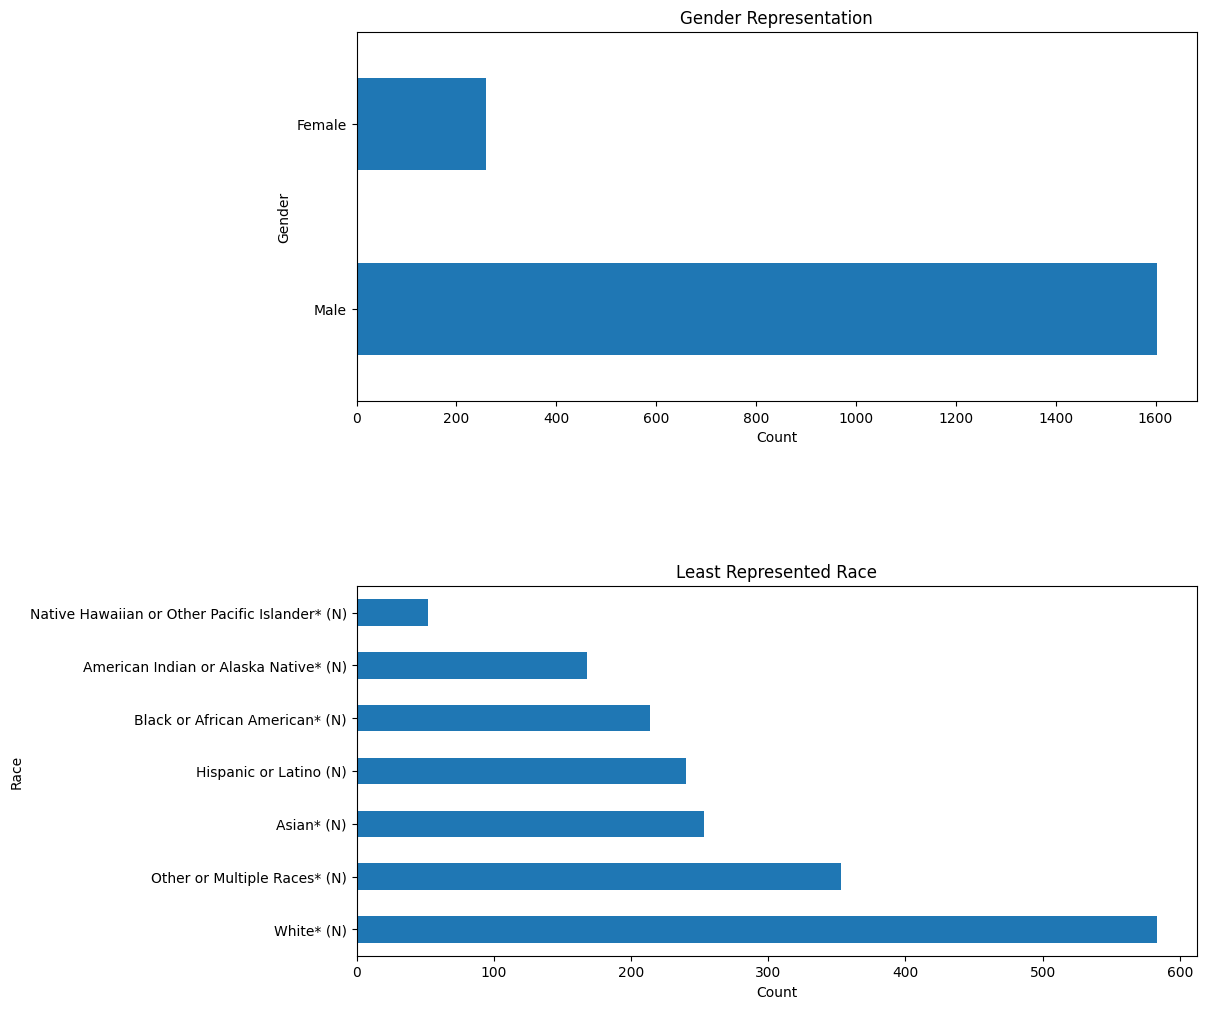

In [171]:
#Create two subplots on 2 row and 1 columns with a figsize of (12, 12)
fig, ax = plt.subplots(2,1, figsize=(12,12))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
#ahrf_data.Gender.value_counts().plot(kind='barh', ax=ax[0])
ahrf_data.Gender.replace({1: "Male", 2: "Female"}).value_counts().plot(kind='barh', ax=ax[0])
#plt.subplots_adjust(left=0.2)
#Give the plot a helpful title of 'Gender Representation'
ax[0].set_title('Gender Representation')
#Label the xaxis 'Count'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
#ahrf_data.Race.replace({1: 'Hispanic or Latino (N)', 2:'White* (N)',
#       3:'Black or African American* (N)', 4:'Asian* (N)',
#       5:'Native Hawaiian or Other Pacific Islander* (N)',
#       6:'American Indian or Alaska Native* (N)', 7:'Other or Multiple Races* (N)'}).value_counts().plot(kind='barh', ax=ax[1])
ahrf_data.Race.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'Least Represented Race'
ax[1].set_title('Least Represented Race')
#Label the xaxis 'Count'
ax[1].set_xlabel('Count')


#Give the subplots a little "breathing room" with a hpace of 0.5
#plt.subplots_adjust(wspace=0.5);
plt.subplots_adjust(hspace=0.5);
#You're encouraged to explore a few different figure sizes, orientations, and spacing here
# as the importance of easy-to-read and informative figures is frequently understated
# and you will find the ability to tweak figures invaluable later on

Average Male and Female count by Occupation 

In [178]:
occupation_gender_means= ahrf_data.groupby('Occupation Code')[['Male (N)','Female (N)']].mean()

In [179]:
occupation_gender_means.head()

,Male (N),Female (N)
Occupation Code,,
D1821,2421.285714,6081.961538
D2001,4178.846154,10900.000000
D2011,3896.000000,17559.961538
D3000,1757.960000,848.404762
D3010,4438.038462,2224.204082


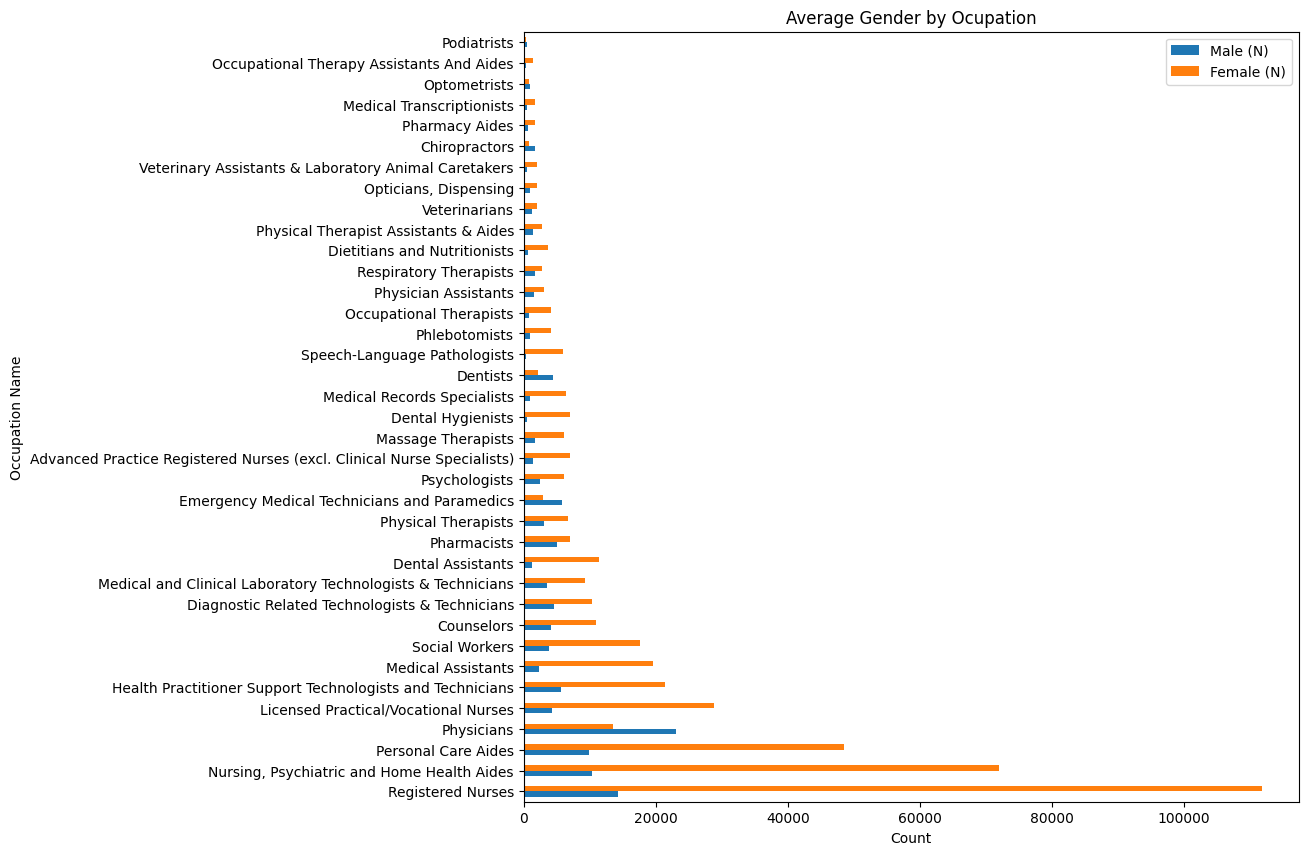

In [181]:
occupationN_gender_means= ahrf_data.groupby('Occupation Name')[['Male (N)','Female (N)']].mean()
# The next bit simply reorders the index by increasing the average of male and female
# Compare the index order you get from
# occupation_gender_mean.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(occupationN_gender_means.reindex(index=occupationN_gender_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Gender by Occupation'))
plt.xlabel('Average');

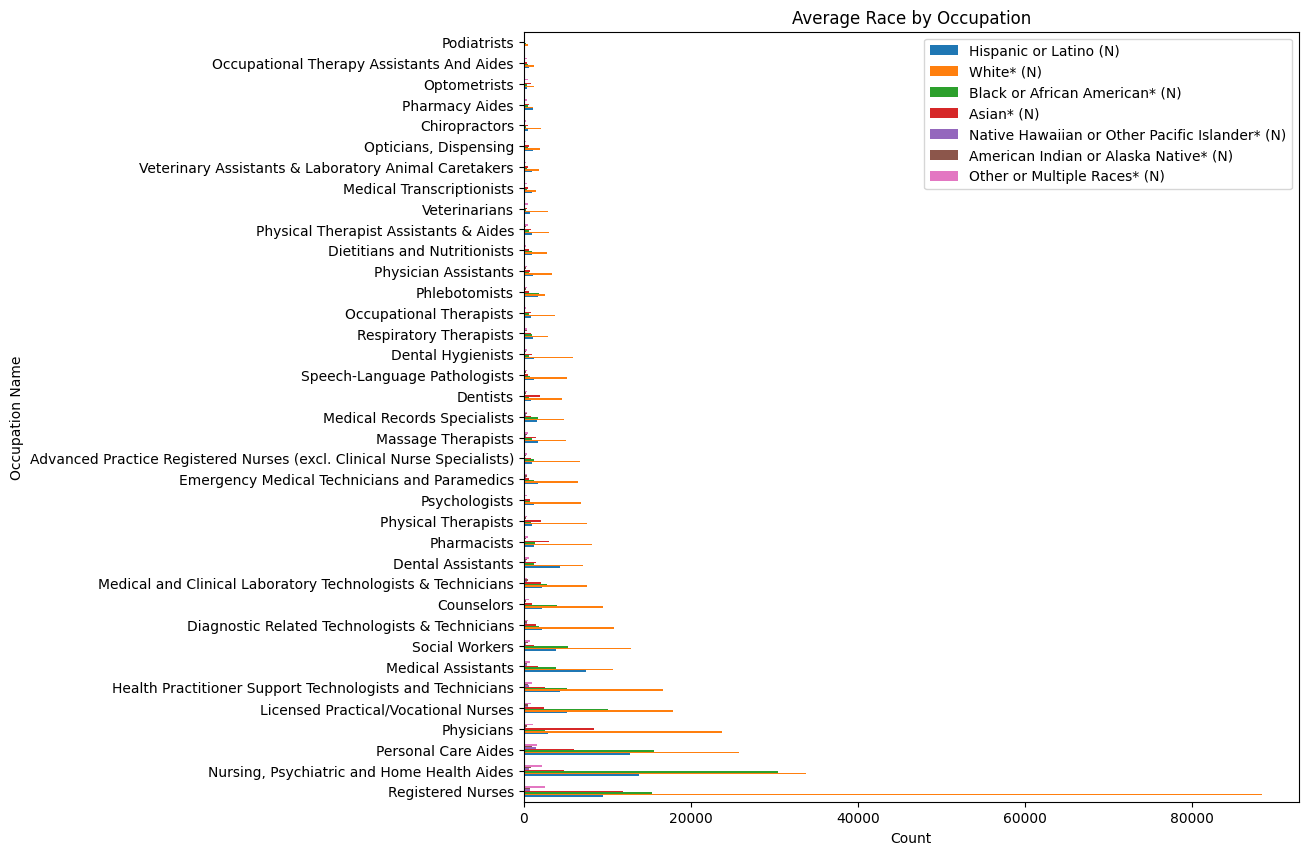

In [182]:
#Repeat above for race
occupationN_race_means= ahrf_data.groupby('Occupation Name')[race_col_names].mean()
# The next bit simply reorders the index by increasing the average of male and female
# Compare the index order you get from
# occupation_gender_mean.index
# with
# state_price_means.mean(axis=1).sort_values(ascending=False).index
# See how this expression simply sits within the reindex()
(occupationN_race_means.reindex(index=occupationN_race_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average Race by Occupation'))
plt.xlabel('Average');

In [254]:
#Use the pd.melt function, pass in the ahrf_data columns 'Geographic Name', 'Male (N)', and 'Female (N)' only,
#specify 'Geographic Name' for `id_vars`
#gather the count from the 'Male (N)' and 'Female (N)' columns using the `value_vars` argument,
#call the resultant price column 'Count' via the `value_name` argument,
#name the gender indicator column 'Gender' via the `var_name` argument

gender_representation = pd.melt(ahrf_data[['Geography Name','Male (N)','Female (N)', 'Occupation Code']], 
                        id_vars=['Geography Name', 'Occupation Code'], 
                        var_name='Gender', 
                        value_vars=['Male (N)','Female (N)'], 
                        value_name='Count',)
# I want to explore group by occupation before melt         

In [257]:
gender_representation.tail()

,Geography Name,Occupation Code,Gender,Count
3843,Washington,D3648,Female (N),2444.0
3844,West Virginia,D3648,Female (N),364.0
3845,Wisconsin,D3648,Female (N),1201.0
3846,Wyoming,D3648,Female (N),NaN
3847,All States,D3648,Female (N),49929.0


In [265]:
#Repeating same for race representation
race_representation = pd.melt(ahrf_data, 
                        id_vars=['Geography Name', 'Occupation Code'], 
                        value_vars=['Race'], 
                        var_name='Race',
                        value_name='Least Represented',)

In [261]:
race_representation.head()

,Geography Name,Occupation Code,Race,Least Represented
0,Alabama,D3256,Race,Asian* (N)
1,Alaska,D3256,Race,White* (N)
2,Arizona,D3256,Race,Other or Multiple Races* (N)
3,Arkansas,D3256,Race,Black or African American* (N)
4,California,D3256,Race,Other or Multiple Races* (N)


In [243]:
ahrf_data['Race'].head()

0                        Asian* (N)
1                        White* (N)
2      Other or Multiple Races* (N)
3    Black or African American* (N)
4      Other or Multiple Races* (N)
Name: Race, dtype: object

In [263]:
gender_representation.head()

,Geography Name,Occupation Code,Gender,Count
0,Alabama,D3256,Male (N),860.0
1,Alaska,D3256,Male (N),NaN
2,Arizona,D3256,Male (N),755.0
3,Arkansas,D3256,Male (N),351.0
4,California,D3256,Male (N),2052.0


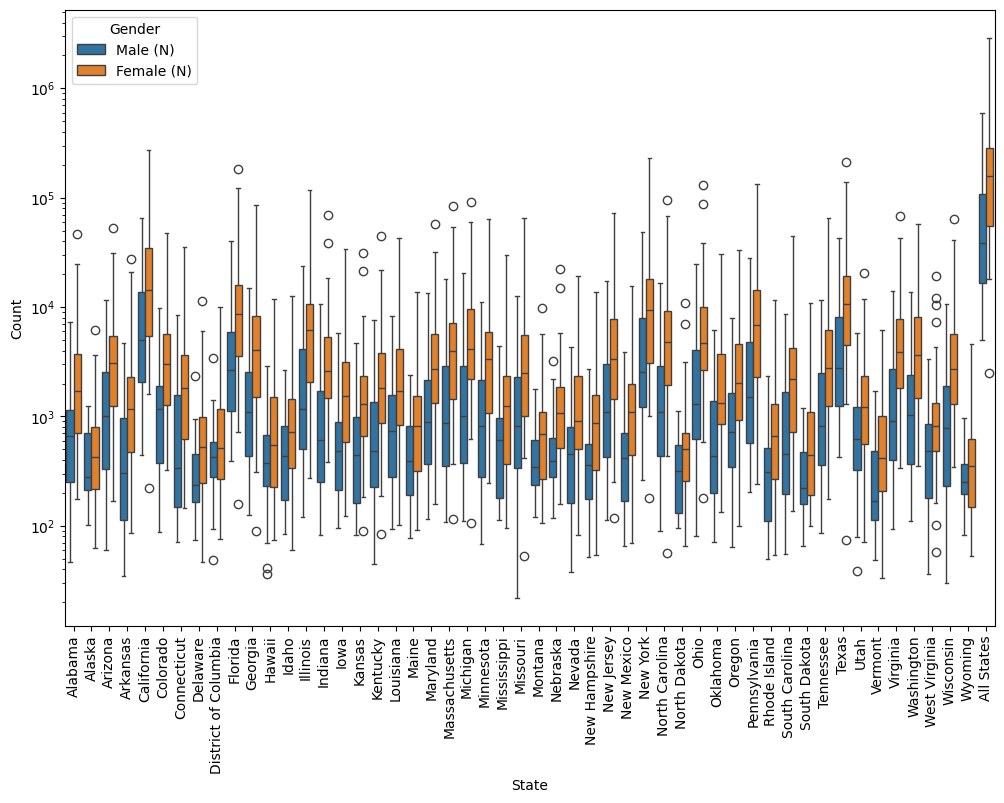

In [270]:
#Create a seaborn boxplot of the gender count dataframe we created above,
#with 'Geographic Name' on the x-axis, 'Count' as the y-value, and a hue that indicates 'Gender'
#This will use boxplot's x, y, hue, and data arguments.
#using log scale to make chart readable.
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Geography Name', y='Count', hue='Gender', data=gender_representation, log_scale=True)
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.xlabel('State');

We can see outlier. Are htese good or bad? Do we need to drop them? Further investigation is necessary

In [271]:
#Numeric Features
ahrf_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Geography Code,1924.0,30.153846,17.714211,1.000,16.75000,29.5000,42.50000,91.000
Total Count,1871.0,16320.588990,108361.596483,39.000,909.50000,2489.0000,7438.50000,3276074.000
Hispanic or Latino (N),967.0,3872.054809,19843.548418,34.000,192.50000,413.0000,1429.00000,346402.000
White* (N),1851.0,10032.891950,66095.662613,34.000,725.00000,1955.0000,5199.00000,2296253.000
Black or African American* (N),985.0,4937.021320,30536.575406,36.000,242.00000,585.0000,2089.00000,730399.000
Asian* (N),875.0,2767.376000,14772.725095,39.000,170.50000,374.0000,1090.50000,296085.000
Native Hawaiian or Other Pacific Islander* (N),72.0,552.236111,1081.364611,26.000,133.75000,214.0000,491.50000,6996.000
American Indian or Alaska Native* (N),261.0,550.624521,1617.391477,14.000,99.00000,187.0000,378.00000,16675.000
Other or Multiple Races* (N),694.0,906.829971,3800.160700,26.000,120.00000,224.5000,523.00000,63481.000
Less than 30 Years Old (N),1561.0,4288.074952,26012.360192,36.000,287.00000,706.0000,2018.00000,632371.000


Finding Missing Values for Gender

In [277]:
missing_gender = ahrf_data[['Male (N)','Female (N)']].isnull().sum(axis=1)
missing_gender.value_counts()/len(missing_gender) * 100

0    81.808732
1    14.968815
2     3.222453
Name: count, dtype: float64

82% of data has a value for gender. About 15% is missing one value, either Male or Female. About 3% is missing both values.
Should we consider dropping when both are missing? To be analyzed further

Doing the same for race

In [278]:
#Using the above defined race column names
missing_race = ahrf_data[race_col_names].isnull().sum(axis=1)
missing_race.value_counts()/len(missing_gender) * 100

6    29.573805
2    17.983368
5    15.696466
3    11.746362
4    11.538462
1     8.004158
7     3.170478
0     2.286902
Name: count, dtype: float64

In [ ]:
Only about 3% of the data is missing all seven races. This is a good sign. We need at least one of the columns to have data. 